## Feature Encoding, Imbalanced class handling & Feature Selection

In [153]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from statistics import mode

pd.set_option("display.max_columns", None)

In [109]:
df = pd.read_csv('dataframe_training.csv')
df = df.drop(['Unnamed: 0'],axis=1)

In [17]:
df

,IsBadBuy,Auction,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,MMR_diff_AuctionAveragePrice,MMR_diff_AuctionCleanPrice,MMR_diff_RetailAveragePrice,MMR_diff_RetailCleanPrice,Purch_year,Purch_month,Purch_date
0,0,ADESA,3,MAZDA,MAZDA3,4D SEDAN I,RED,AUTO,1.0,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973,33619,7100.0,0,1113,704.0,1277.0,39.0,1191.0,2009,12,7
1,0,ADESA,5,DODGE,1500 RAM PICKUP 2WD,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638,33619,7600.0,0,1053,-602.0,-839.0,-477.0,-219.0,2009,12,7
2,0,ADESA,4,DODGE,STRATUS V6,4D SEDAN SXT FFV,MAROON,AUTO,2.0,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,33619,4900.0,0,1389,-833.0,-797.0,-203.0,-245.0,2009,12,7
3,0,ADESA,5,DODGE,NEON,4D SEDAN,SILVER,AUTO,1.0,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,19638,33619,4100.0,0,630,49.0,29.0,283.0,172.0,2009,12,7
4,0,ADESA,4,FORD,FOCUS,2D COUPE ZX3,SILVER,MANUAL,2.0,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,19638,33619,4000.0,0,1020,666.0,670.0,984.0,796.0,2009,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,ADESA,8,MERCURY,SABLE,4D SEDAN GS,BLACK,AUTO,1.0,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,18111,30212,4200.0,0,993,-194.0,-62.0,-2180.0,-2205.0,2009,12,2
72979,0,ADESA,2,CHEVROLET,MALIBU 4C,4D SEDAN LS,SILVER,AUTO,2.0,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,18881,30212,6200.0,0,1038,-367.0,-807.0,-2720.0,-3241.0,2009,12,2
72980,0,ADESA,4,JEEP,GRAND CHEROKEE 2WD V,4D WAGON LAREDO,SILVER,AUTO,1.0,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,18111,30212,8200.0,0,1893,170.0,157.0,-2102.0,-3146.0,2009,12,2
72981,0,ADESA,3,CHEVROLET,IMPALA,4D SEDAN LS,WHITE,AUTO,1.0,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,18881,30212,7000.0,0,1974,-170.0,-80.0,-2665.0,-2516.0,2009,12,2


### Categorical features encoding

In [118]:
list_categorical = ['Auction','Make', 'Model', 'SubModel','Transmission', 'Color','Nationality', 'Size','TopThreeAmericanName']

list_columns = ['VehicleAge', 'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'MMR_diff_AuctionAveragePrice',
       'MMR_diff_AuctionCleanPrice', 'MMR_diff_RetailAveragePrice',
       'MMR_diff_RetailCleanPrice', 'Purch_year', 'Purch_month', 'Purch_date']



In [119]:
# list_columns=list(df.columns)
db2 = df[list_categorical]
db3 = df[list_columns]
enc = OrdinalEncoder()

X2 = enc.fit_transform(db2)
X1 = np.array(db3)
X = np.concatenate((X2,X1),axis=1)
Y = np.array(df[['IsBadBuy']])

In [120]:
X

array([[0.000e+00, 1.700e+01, 5.860e+02, ..., 2.009e+03, 1.200e+01,
        7.000e+00],
       [0.000e+00, 5.000e+00, 0.000e+00, ..., 2.009e+03, 1.200e+01,
        7.000e+00],
       [0.000e+00, 5.000e+00, 8.830e+02, ..., 2.009e+03, 1.200e+01,
        7.000e+00],
       ...,
       [0.000e+00, 1.300e+01, 4.360e+02, ..., 2.009e+03, 1.200e+01,
        2.000e+00],
       [0.000e+00, 3.000e+00, 4.770e+02, ..., 2.009e+03, 1.200e+01,
        2.000e+00],
       [0.000e+00, 1.700e+01, 5.950e+02, ..., 2.009e+03, 1.200e+01,
        2.000e+00]])

### Standardization of features

In [121]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [122]:
X

array([[-1.57821986,  1.0384319 ,  0.24256908, ..., -1.04000031,
         1.57857366, -1.02034843],
       [-1.57821986, -0.49230901, -1.80905948, ..., -1.04000031,
         1.57857366, -1.02034843],
       [-1.57821986, -0.49230901,  1.28238764, ..., -1.04000031,
         1.57857366, -1.02034843],
       ...,
       [-1.57821986,  0.52818493, -0.28259182, ..., -1.04000031,
         1.57857366, -1.60895825],
       [-1.57821986, -0.74743249, -0.13904784, ..., -1.04000031,
         1.57857366, -1.60895825],
       [-1.57821986,  1.0384319 ,  0.27407873, ..., -1.04000031,
         1.57857366, -1.60895825]])

### Feature Selection
Feature Selection using Gini impurity

In [123]:
# Gini Impurity of the target variable

def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

class_value_counts = df['IsBadBuy'].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the target variable is {gini_class:.3f}')

Number of samples in each class is:
0    64007
1     8976
Name: IsBadBuy, dtype: int64

Gini Impurity of the target variable is 0.216


In [124]:
# Gini Impurity for the attributes

def gini_split_a(attribute_name):
    attribute_values = df[attribute_name].value_counts()
#     return attribute_values
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = df['IsBadBuy'][df[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
df_columns = list(df.columns)
for key in df_columns:
    gini_attiribute[key] = gini_split_a(key)
# print(gini_attiribute)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for IsBadBuy is 0.000
Gini for Auction is 0.215
Gini for VehicleAge is 0.210
Gini for Make is 0.214
Gini for Model is 0.205
Gini for SubModel is 0.208
Gini for Color is 0.216
Gini for Transmission is 0.216
Gini for WheelTypeID is 0.215
Gini for VehOdo is 0.098
Gini for Nationality is 0.216
Gini for Size is 0.215
Gini for TopThreeAmericanName is 0.215
Gini for MMRAcquisitionAuctionAveragePrice is 0.177
Gini for MMRAcquisitionAuctionCleanPrice is 0.174
Gini for MMRAcquisitionRetailAveragePrice is 0.170
Gini for MMRAcquisitonRetailCleanPrice is 0.168
Gini for MMRCurrentAuctionAveragePrice is 0.176
Gini for MMRCurrentAuctionCleanPrice is 0.172
Gini for MMRCurrentRetailAveragePrice is 0.167
Gini for MMRCurrentRetailCleanPrice is 0.164
Gini for BYRNO is 0.213
Gini for VNZIP1 is 0.212
Gini for VehBCost is 0.203
Gini for IsOnlineSale is 0.216
Gini for WarrantyCost is 0.209
Gini for MMR_diff_AuctionAveragePrice is 0.199
Gini for MMR_diff_AuctionCleanPrice is 0.198
Gini for MMR_diff_RetailA

Since the gini impurities for all the attributes are low enough, we won't be removing any feature. It seems all the features are kind of important. 

### Imbalanced Class Handling

The dataset has 87.7% negative class and 12% majority class. There are several ways in which we can handle imbalanced classes, which are as follows:
1. Random Under-sampling
2. Random Over-sampling: SMOTE | Tomek Links
3. NearMiss

For this classification problem, we will be using Synthetic Minority Oversampling Technique (SMOTE).
(Later, i might try to balance the dataset using random under-sampling technique)

In [125]:
count_x = df['IsBadBuy'].value_counts()
print(count_x)

0    64007
1     8976
Name: IsBadBuy, dtype: int64


In [126]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X,Y)

print('Original dataset shape', sum(a==0 for row in Y for a in row), sum(b==1 for row in Y for b in row))
print('Resample dataset shape', sum(b==0 for b in y_smote), sum(b==1 for b in y_smote))

Original dataset shape 64007 8976
Resample dataset shape 64007 64007


## Modeling & Evaluation

In [127]:
# model_linearReg = LinearRegression().fit(x_smote,y_smote)

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3)

In [128]:
## Logistic Regression

model_linearReg = LogisticRegression()
model_linearReg.fit(x_train,y_train)
# print(model_a.coef_)
prediction_linearReg = model_linearReg.predict(x_test)
# print('MSE: ', metrics.mean_absolute_error(y_test, prediction_linearReg))
# print(model_linearReg.coef_)

I will be using the following Performance metrics for evaluation:
1. Confusion Matrix
2. Precision
3. Recall
4. F1 score
5. Area Under ROC curve

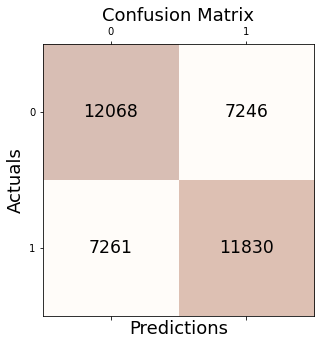

Precision: 0.620
Recall: 0.620
F1 Score: 0.620


In [129]:
conf_matrix = confusion_matrix(y_test,prediction_linearReg)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, prediction_linearReg))
print('Recall: %.3f' % recall_score(y_test, prediction_linearReg))
print('F1 Score: %.3f' % f1_score(y_test, prediction_linearReg))
# print(y_train)

In [130]:
# SVC

model_SVC = SVC()
model_SVC.fit(x_train,y_train)
# print(model_a.coef_)
prediction_SVC = model_SVC.predict(x_test)

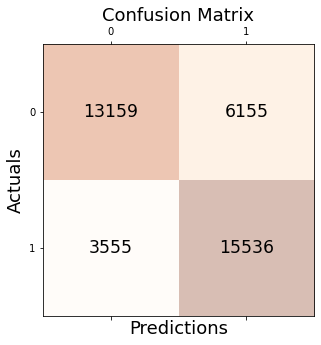

Precision: 0.716
Recall: 0.814
F1 Score: 0.762


In [131]:
conf_matrix = confusion_matrix(y_test,prediction_SVC)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, prediction_SVC))
print('Recall: %.3f' % recall_score(y_test, prediction_SVC))
print('F1 Score: %.3f' % f1_score(y_test, prediction_SVC))
# print(y_train)

In [132]:
# Random Forest Classifier

model_randomForest = RandomForestClassifier() 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model_randomForest.fit(x_train, y_train)
 
# performing predictions on the test dataset
prediction_randomForest = model_randomForest.predict(x_test)

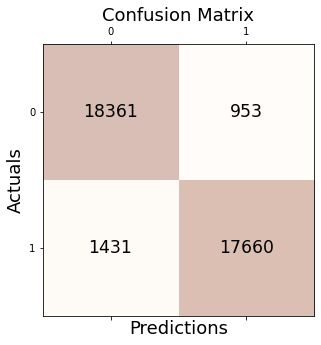

Precision: 0.949
Recall: 0.925
F1 Score: 0.937


In [133]:
conf_matrix = confusion_matrix(y_test,prediction_randomForest)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, prediction_randomForest))
print('Recall: %.3f' % recall_score(y_test, prediction_randomForest))
print('F1 Score: %.3f' % f1_score(y_test, prediction_randomForest))
# print(y_train)

In [134]:
# Gradient Boosting Classifier

model_gradientBoost = GradientBoostingClassifier() 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model_gradientBoost.fit(x_train, y_train)
 
# performing predictions on the test dataset
prediction_gradientBoost = model_gradientBoost.predict(x_test)

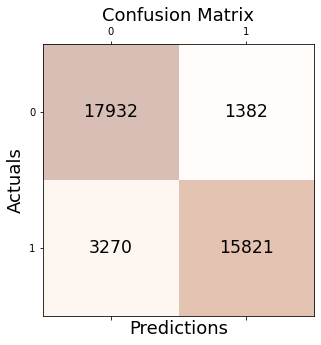

Precision: 0.920
Recall: 0.829
F1 Score: 0.872


In [135]:
conf_matrix = confusion_matrix(y_test,prediction_gradientBoost)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, prediction_gradientBoost))
print('Recall: %.3f' % recall_score(y_test, prediction_gradientBoost))
print('F1 Score: %.3f' % f1_score(y_test, prediction_gradientBoost))
# print(y_train)

In [136]:
 # XGBoost Classifier
    
model_XGboost = XGBClassifier() 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model_XGboost.fit(x_train, y_train)
 
# performing predictions on the test dataset
prediction_XGboost = model_XGboost.predict(x_test)

C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


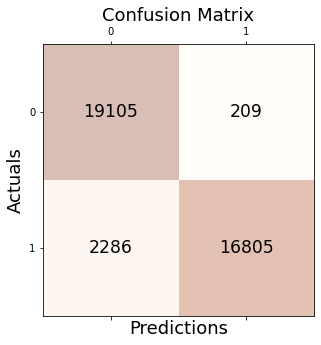

Precision: 0.988
Recall: 0.880
F1 Score: 0.931


In [137]:
conf_matrix = confusion_matrix(y_test,prediction_XGboost)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, prediction_XGboost))
print('Recall: %.3f' % recall_score(y_test, prediction_XGboost))
print('F1 Score: %.3f' % f1_score(y_test, prediction_XGboost))
# print(y_train)

In [138]:
# AdaBoostClassifier

model_AdaBoost = AdaBoostClassifier() 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model_AdaBoost.fit(x_train, y_train)
 
# performing predictions on the test dataset
prediction_AdaBoost = model_AdaBoost.predict(x_test)

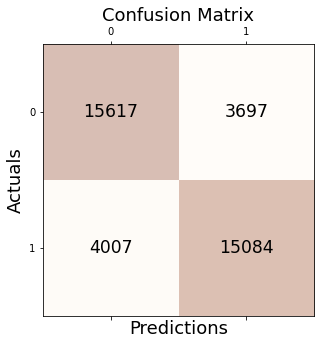

Precision: 0.803
Recall: 0.790
F1 Score: 0.797


In [139]:
conf_matrix = confusion_matrix(y_test,prediction_AdaBoost)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, prediction_AdaBoost))
print('Recall: %.3f' % recall_score(y_test, prediction_AdaBoost))
print('F1 Score: %.3f' % f1_score(y_test, prediction_AdaBoost))
# print(y_train)

I couldn't train a model on neural networks because of lack of time and resources.

In [141]:
## Trained the model using Logistic Regression, SVC, Random Forest, Gradient Boosting, XGoost and AdaBoost
## Here are the results

data = {'Model':['Logistic Regression','SVC','Random Forest','Gradient Boosting','XGBoost','AdaBoost'],
        'Precision': [precision_score(y_test, prediction_linearReg), precision_score(y_test, prediction_SVC),precision_score(y_test, prediction_randomForest),precision_score(y_test, prediction_gradientBoost),precision_score(y_test, prediction_XGboost),precision_score(y_test, prediction_AdaBoost)],
        'Recall': [recall_score(y_test, prediction_linearReg), recall_score(y_test, prediction_SVC),recall_score(y_test, prediction_randomForest),recall_score(y_test, prediction_gradientBoost),recall_score(y_test, prediction_XGboost),recall_score(y_test, prediction_AdaBoost)],
        'F1 score': [f1_score(y_test, prediction_linearReg), f1_score(y_test, prediction_SVC),f1_score(y_test, prediction_randomForest),f1_score(y_test, prediction_gradientBoost),f1_score(y_test, prediction_XGboost),f1_score(y_test, prediction_AdaBoost)]
        }

dataframe1 = pd.DataFrame(data)

print (dataframe1)

                 Model  Precision    Recall  F1 score
0  Logistic Regression   0.620151  0.619664  0.619907
1                  SVC   0.716242  0.813787  0.761905
2        Random Forest   0.948799  0.925043  0.936771
3    Gradient Boosting   0.919665  0.828715  0.871825
4              XGBoost   0.987716  0.880258  0.930896
5             AdaBoost   0.803152  0.790111  0.796578


The best performing models are: Random Forest, Gradient Boosting and XGBoost.

## Testing

In [142]:
dataframe_test = pd.read_csv('dataframe_testing.csv')
dataframe_test = dataframe_test.drop(['Unnamed: 0'],axis=1)

In [143]:
dataframe_test

,Auction,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,Purch_year,Purch_month,Purch_date,MMR_diff_AuctionAveragePrice,MMR_diff_AuctionCleanPrice,MMR_diff_RetailAveragePrice,MMR_diff_RetailCleanPrice
0,ADESA,4,PONTIAC,GRAND PRIX,4D SEDAN,SILVER,AUTO,1.0,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,18881,30212,6500.0,0,2152,2009,12,2,127.0,205.0,-2622.0,-2355.0
1,ADESA,4,CHEVROLET,MALIBU V6,4D SEDAN LS,SILVER,AUTO,1.0,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,18111,30212,6300.0,0,1118,2009,12,2,-143.0,-25.0,-2200.0,-2656.0
2,ADESA,3,DODGE,DURANGO 2WD V8,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,18111,30212,9700.0,0,1215,2009,12,2,-639.0,875.0,-3776.0,-1928.0
3,ADESA,7,SATURN,L SERIES,4D SEDAN L200,GOLD,AUTO,1.0,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,18881,30212,4150.0,0,1933,2009,12,2,-370.0,-65.0,-2462.0,-2073.0
4,ADESA,2,HYUNDAI,ACCENT,2D COUPE GS,BLUE,AUTO,2.0,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,18111,30212,4100.0,0,920,2009,12,2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48536,MANHEIM,5,FORD,FIVE HUNDRED,4D SEDAN SEL,BLACK,AUTO,1.0,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,20928,33411,7955.0,0,1633,2010,11,17,-403.0,-129.0,-777.0,-490.0
48537,MANHEIM,3,TOYOTA,COROLLA,4D SEDAN CE,GREEN,AUTO,2.0,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,20928,33411,7035.0,0,594,2010,11,17,-7.0,-191.0,716.0,456.0
48538,MANHEIM,4,KIA,SPECTRA,4D SEDAN EX,BLACK,AUTO,2.0,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,20928,33411,6335.0,0,594,2010,11,17,-171.0,-201.0,101.0,180.0
48539,MANHEIM,5,MAZDA,MAZDA3,4D SEDAN GT,SILVER,AUTO,1.0,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,20928,33411,8055.0,0,1038,2010,11,17,861.0,1313.0,561.0,2012.0


In [144]:
# list_columns=list(df.columns)
db_test2 = dataframe_test[list_categorical]
db_test3 = dataframe_test[list_columns]

X2_test = enc.transform(db_test2)
X1_test = np.array(db_test3)
X_test = np.concatenate((X2_test,X1_test),axis=1)
# Y = np.array(df[['IsBadBuy']])

In [145]:
X_test = scaler.transform(X_test)

In [146]:
# Using Ensemble method: considering the output which has occurred maximum number of time for each test sample
predict_rf = model_randomForest.predict(X_test)
predict_gb = model_gradientBoost.predict(X_test)
predict_xgb = model_XGboost.predict(X_test)

In [154]:
predict_rf=list(predict_rf)
predict_gb=list(predict_gb)
predict_xgb=list(predict_xgb)

predict = []

list_extra=[]
for i in range(len(predict_rf)):
    list_extra=[predict_rf[i],predict_gb[i],predict_xgb[i]]
    predict.append(mode(list_extra))
    
predict = np.array(predict)

In [156]:
dataframe_test['IsBadBuy_Classify'] = predict

In [157]:
dataframe_test

,Auction,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,Purch_year,Purch_month,Purch_date,MMR_diff_AuctionAveragePrice,MMR_diff_AuctionCleanPrice,MMR_diff_RetailAveragePrice,MMR_diff_RetailCleanPrice,IsBadBuy_Classify
0,ADESA,4,PONTIAC,GRAND PRIX,4D SEDAN,SILVER,AUTO,1.0,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,18881,30212,6500.0,0,2152,2009,12,2,127.0,205.0,-2622.0,-2355.0,0
1,ADESA,4,CHEVROLET,MALIBU V6,4D SEDAN LS,SILVER,AUTO,1.0,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,18111,30212,6300.0,0,1118,2009,12,2,-143.0,-25.0,-2200.0,-2656.0,0
2,ADESA,3,DODGE,DURANGO 2WD V8,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,18111,30212,9700.0,0,1215,2009,12,2,-639.0,875.0,-3776.0,-1928.0,0
3,ADESA,7,SATURN,L SERIES,4D SEDAN L200,GOLD,AUTO,1.0,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,18881,30212,4150.0,0,1933,2009,12,2,-370.0,-65.0,-2462.0,-2073.0,0
4,ADESA,2,HYUNDAI,ACCENT,2D COUPE GS,BLUE,AUTO,2.0,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,18111,30212,4100.0,0,920,2009,12,2,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48536,MANHEIM,5,FORD,FIVE HUNDRED,4D SEDAN SEL,BLACK,AUTO,1.0,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,20928,33411,7955.0,0,1633,2010,11,17,-403.0,-129.0,-777.0,-490.0,0
48537,MANHEIM,3,TOYOTA,COROLLA,4D SEDAN CE,GREEN,AUTO,2.0,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,20928,33411,7035.0,0,594,2010,11,17,-7.0,-191.0,716.0,456.0,0
48538,MANHEIM,4,KIA,SPECTRA,4D SEDAN EX,BLACK,AUTO,2.0,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,20928,33411,6335.0,0,594,2010,11,17,-171.0,-201.0,101.0,180.0,0
48539,MANHEIM,5,MAZDA,MAZDA3,4D SEDAN GT,SILVER,AUTO,1.0,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,20928,33411,8055.0,0,1038,2010,11,17,861.0,1313.0,561.0,2012.0,0


In [158]:
dataframe_test.to_csv('test_output_file.csv')